<a href="https://colab.research.google.com/github/antonellafontanetto/DataScience/blob/main/Notebook_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Programa Ingenia+ Data Science

Recordemos que un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

En clases anteriores, trabajamos con el dataset `StudentPerformace`. Pudimos observar el tipo de datos que teniamos y le hiciemos algunas transformaciones.

Llego la hora de utilizar los conceptos de aprendizaje supervisado para hacer predicciones sobre alguna variable en el dataset.

Para poder ajustar modelos de Machine Learning, la herramienta más sencilla y más utilizada es `scikit-learn`. Esta librería es muy utilizada ya que contiene funciones desarrolladas para la mayoría de los modelos de machine learning. Además `Scikit-learn` tienen una amplia y muy buena [documentación](https://scikit-learn.org/stable/).

<font size=5> 🚀 👩🏽‍💻 Machine Learning: Aprendizaje Supervisado 📣</font>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm #importo un submodulo cm (colormap)

In [3]:
import os #permite interactuar con el sistema operativo os permite navegar por carpetas (directorios), leer, crear, renombrar o eliminar archivos

In [4]:
os.getcwd() #get current working directory, es decir, devuelve la ruta del directorio actual en el que está trabajando Python

'/content'

Primero, vamos a leer los datos limpios y procesados.

In [6]:
# Leemos nuevamente los datos de los estudiantes
students = pd.read_csv('/content/estudiantes_limpio.csv')

In [7]:
students.head()

,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,1,1,1,72.0,72,74,73.0,1,0,0,1,0,0,0,0
1,2,1,0,69.0,90,88,89.0,1,0,0,0,0,0,1,0
2,1,1,1,90.0,95,93,94.0,1,0,0,0,0,1,0,0
3,0,0,1,47.0,57,44,50.5,0,1,1,0,0,0,0,0
4,2,1,1,76.0,78,75,76.5,0,1,0,0,0,0,1,0


Antes que nada, chequeemos nuevamente que eliminamos todos los valores faltantes.

In [8]:
students.isnull().sum()

,0
race/ethnicity,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
english score,0
female,0
male,0
associate's degree,0


Ahora tenemos que decidir que variable o variables vamos a predecir. Esto quiere decir que tenemos que elegir cual va a ser la variable que al predecirla conteste la pregunta que nos hicimos de los datos.

Lo que queremos saber es:

1. ¿Qué puntaje final obtendra un estudiante?
2. Dado un estudiante, ¿aprobara o no el examen?

**_¿Qué tipo de problemas estamos tratando de resolver?_**

Para contestar estas preguntas vamos a obtener dos nuevas variables:

1. El puntaje final: Lo obtendremos promediando los tres puntajes (matematica, lectura y escritura)
2. Aprobado: Una etiqueta que me permita saber si cada estudiante del dataset aprobo el examen (puntaje final >= 60) o no lo aprobo (puntaje final < 60).

In [9]:
students['puntaje_final'] = (students['math score'] + students['reading score'] + students['writing score']) / 3

In [10]:
students.head()

,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,puntaje_final
0,1,1,1,72.0,72,74,73.0,1,0,0,1,0,0,0,0,72.666667
1,2,1,0,69.0,90,88,89.0,1,0,0,0,0,0,1,0,82.333333
2,1,1,1,90.0,95,93,94.0,1,0,0,0,0,1,0,0,92.666667
3,0,0,1,47.0,57,44,50.5,0,1,1,0,0,0,0,0,49.333333
4,2,1,1,76.0,78,75,76.5,0,1,0,0,0,0,1,0,76.333333


## 📈 Regresión

Comenzaremos contestando la pregunta 1. Este problema es un problema de regresión (_¿Por qué?_)

### Seleccion de target (y) y variables (X)

Lo primero que haremos, es seleccionar las variables o features que deseemos usar como variable independientes (aquellas que van a explicar mi predicción) y la variable a predecir.

Usaremos todas las variables menos aquellas que fueron usadas para calcular el puntaje final. Debemos también asegurarnos de no incluir las variables a predecir. Como variable a predecir usaremos el puntaje final.

In [11]:
# Elimino aquellas variables que no quiero incluir en el modelo y las guardo en x.
x = students.drop(['math score', 'reading score', 'writing score', 'english score', 'puntaje_final'],
                  axis=1)

In [12]:
x.head()

,race/ethnicity,lunch,test preparation course,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,1,1,1,1,0,0,1,0,0,0,0
1,2,1,0,1,0,0,0,0,0,1,0
2,1,1,1,1,0,0,0,0,1,0,0
3,0,0,1,0,1,1,0,0,0,0,0
4,2,1,1,0,1,0,0,0,0,1,0


In [13]:
lista_atributos = x.columns

In [14]:
# Ahora selecciono las etiquetas y las guardo en y.
y = students['puntaje_final']

In [15]:
x, y = np.array(x), np.array(y)

In [16]:
x

array([[1, 1, 1, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [3, 1, 0, ..., 0, 1, 0],
       [3, 0, 1, ..., 0, 1, 0]])

In [17]:
y[:10]

array([72.66666667, 82.33333333, 92.66666667, 49.33333333, 76.33333333,
       77.33333333, 91.66666667, 40.66666667, 65.        , 49.33333333])

### Separando Train / Test

Ahora tenemos que separar el dataset en conjuntos de entrenamiento (X_train, y_train) y de testeo (X_test, y_test) usando la función train_test_split de scikit-learn.

¿Por qué separamos el dataset? Porque es necesario entrenar el modelo con un set de datos. El modelo no puede ver los datos de evaluación cuando se esta entrenando!

La forma en que se dividen los datos normalmente es 80% entrenamiento -20% evaluación)

In [18]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)  #un numero aleatorio para fijar cuantas veces testeamos

In [20]:
x.shape

(1000, 11)

In [21]:
X_train.shape

(800, 11)

In [22]:
y_test.shape

(200,)

In [23]:
X_test.shape

(200, 11)

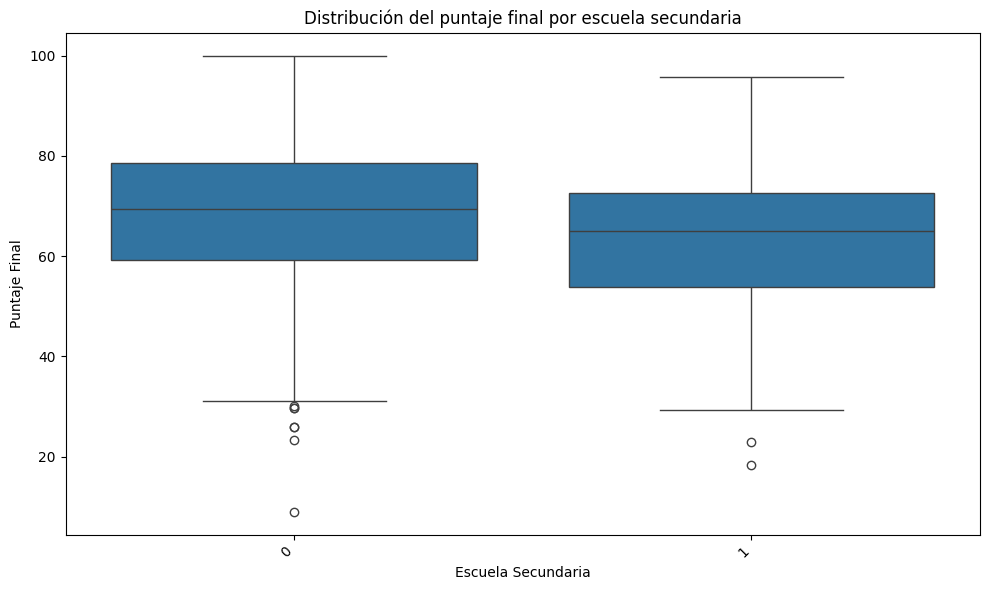

In [28]:
# prompt: generar un gráfico de esta regresion

import matplotlib.pyplot as plt
# Now, let's generate a plot of the regression.
# Since we haven't trained a model yet, we'll plot the relationship between one of the features (e.g., 'parental level of education') and the target variable ('puntaje_final').
# We need the original dataframe with column names for plotting.
students_plot = students.copy()

# Let's use 'parental level of education' as an example feature for visualization.
# We'll create a box plot to show the distribution of 'puntaje_final' for each education level.

plt.figure(figsize=(10, 6))
sns.boxplot(x='high school', y='puntaje_final', data=students_plot)
plt.title('Distribución del puntaje final por escuela secundaria')
plt.xlabel('Escuela Secundaria')
plt.ylabel('Puntaje Final')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# If you have a trained regression model (e.g., after fitting a Linear Regression),
# you could also plot the predicted values against the actual values on the test set.
# For example, if you had a model named `model` and had made predictions `y_pred` on `X_test`:

# plt.figure(figsize=(8, 8))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Line of perfect prediction
# plt.xlabel('Actual Puntaje Final')
# plt.ylabel('Predicted Puntaje Final')
# plt.title('Actual vs. Predicted Puntaje Final (After Model Training)')
# plt.grid(True)
# plt.show()

Este es un **boxplot (o gráfico de caja)** hecho con Seaborn y Matplotlib. Se usa para visualizar la distribución de una variable numérica (en este caso, el "Puntaje Final") en función de una variable categórica (en este caso, si fue a "Escuela Secundaria").

🔍 **Interpretación del gráfico:**
Eje X (horizontal):
Muestra dos categorías de la variable "Escuela Secundaria":

0: No asistió a escuela secundaria

1: Sí asistió a escuela secundaria

Eje Y (vertical):
Representa el "Puntaje Final".

Cada caja (box):

Línea central: Mediana (percentil 50) del puntaje

Borde inferior y superior de la caja: Representan el primer (Q1) y tercer cuartil (Q3)

"Bigotes" (whiskers): Se extienden hasta el mínimo y máximo dentro de 1.5 veces el rango intercuartílico

Puntos fuera de los bigotes: Son outliers (valores atípicos)

📊 **¿Qué dice este gráfico?**
Comparación de distribución: Puedes comparar cómo se distribuyen los puntajes finales entre quienes no fueron a escuela secundaria (0) y quienes sí fueron (1).

En el gráfico parece que:

La mediana de los que no asistieron es un poco más alta.

Hay mayor dispersión en ese grupo también.

Ambos grupos tienen algunos outliers.

### Random Forest

Recordemos que Random Forest es un algoritmo de ensamble. Hay dos tecnicas para esto: Bagging y Boosting.

El objetivo de bagging es entrenar distintos modelos, donde cada uno vea distintas porciones del set de entrenamiento. Random Forest, además de aplicar Bagging, también selecciona features al azar, de esa manera descorrelaciona aún más los distintos modelos de árbol creados.

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
from sklearn.metrics import mean_absolute_error

In [36]:
# Inicializo el modelo
regresor = RandomForestRegressor(criterion='absolute_error', random_state=42)

In [37]:
# Entreno el modelo
regresor.fit(X_train, y_train);

In [38]:
regresor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Ahora evaluaremos el modelo (Profundizaremos este concepto más adelante). Primero, hacemos predicciones para el set de evaluación y luego lo comparamos con los valores reales.

In [39]:
# Predigo los valores para el set de testeo
y_pred = regresor.predict(X_test)

In [40]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred)

11.390941666666668

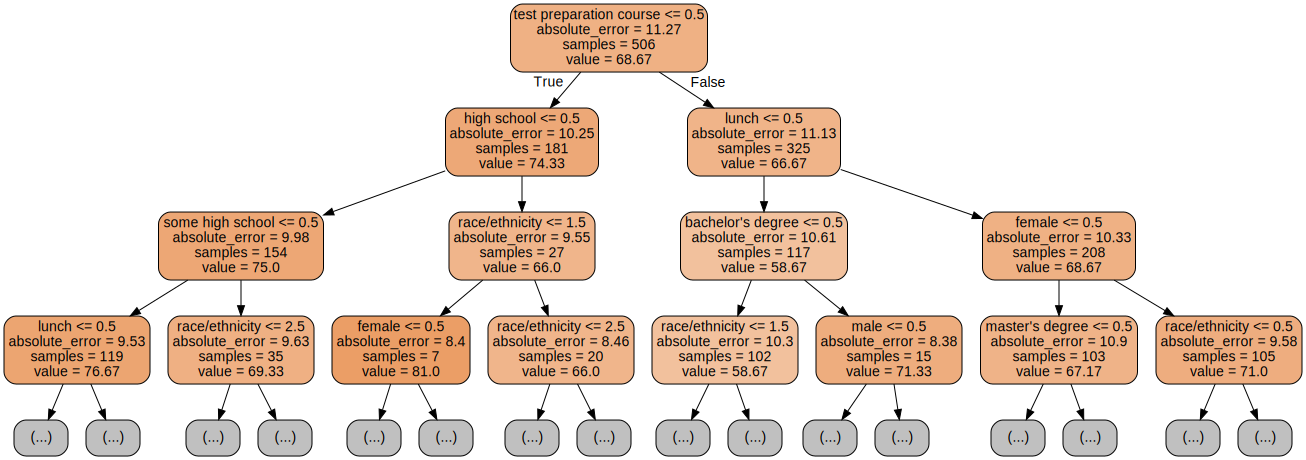

In [48]:
# prompt: un gráfico de arbol

# To plot a single decision tree from the Random Forest Regressor,
# we need to export one of the trees and visualize it.
# This requires the `graphviz` library.

!pip install graphviz

import graphviz
from sklearn.tree import export_graphviz

# Select a single tree from the trained Random Forest
# We can choose the first tree for simplicity (index 0)
single_tree = regresor.estimators_[0]

# Export the tree to a DOT format file
export_graphviz(single_tree, out_file='tree.dot',
                feature_names=lista_atributos, # Use the feature names from your original x DataFrame
                rounded=True, proportion=False,
                precision=2, filled=True,
                max_depth=3)

# Read the DOT file and create a graph
with open('tree.dot') as f:
    dot_graph = f.read()

# Render the graph
# This will display the tree directly in the notebook
graphviz.Source(dot_graph)


### Support Vector Machine

Recordemos que el SVM es un algortimo que establece un hiperplano que separa los puntos maximizando el margen. A su vez, una de sus ventajas es la aplicación de Kernels que me permite ajustar mejor el modelo.


In [49]:
from sklearn.svm import SVR

In [50]:
# Inicializo el modelo
regresor_svr = SVR(C=1.0, epsilon=0.2)

In [51]:
# Entreno el modelo
regresor_svr.fit(X_train, y_train);

In [52]:
regresor_svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Ahora evaluaremos el modelo (Profundizaremos este concepto más adelante). Primero, hacemos predicciones para el set de evaluación y luego lo comparamos con los valores reales.

In [53]:
# Predigo los valores para el set de testeo
y_pred_svr = regresor_svr.predict(X_test)

In [54]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred_svr)

10.610220119303728

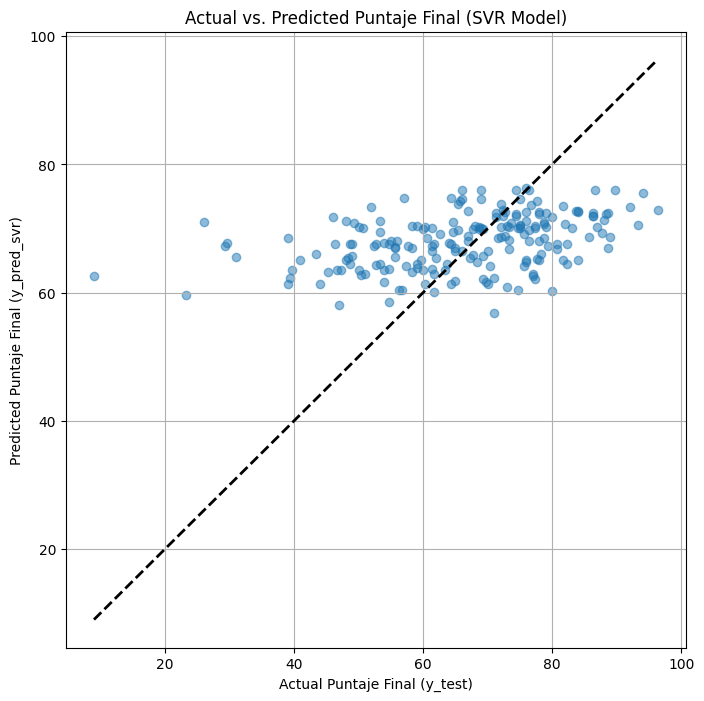

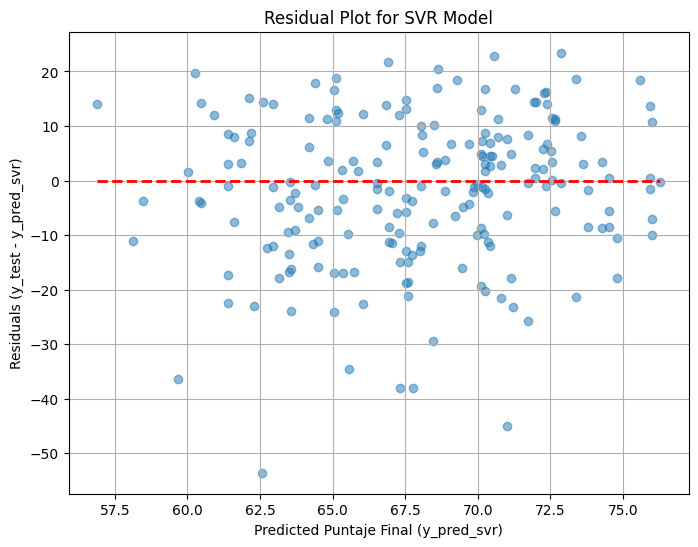

In [57]:
# prompt: gráfico Support Vector Machine para este ejemplo

import matplotlib.pyplot as plt
# For Support Vector Regression (SVR), visualizing the decision boundary is generally difficult
# and not directly applicable in high-dimensional feature spaces or with complex kernels.
# SVR finds a hyperplane in a potentially high-dimensional space, and projecting that back
# to a 2D or 3D plot that clearly shows the 'hyperplane' and the 'margin' is often not
# feasible or informative for more than 2 features.

# However, we can visualize the SVR's performance by plotting the predicted values against the actual values,
# similar to what was suggested for the general regression plot.

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Line of perfect prediction
plt.xlabel('Actual Puntaje Final (y_test)')
plt.ylabel('Predicted Puntaje Final (y_pred_svr)')
plt.title('Actual vs. Predicted Puntaje Final (SVR Model)')
plt.grid(True)
plt.show()

# Another common way to visualize regression model performance is to plot the residuals.
# Residuals are the differences between the actual values and the predicted values.
# For a good model, residuals should be randomly scattered around zero.

residuals_svr = y_test - y_pred_svr

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_svr, residuals_svr, alpha=0.5)
plt.hlines(0, y_pred_svr.min(), y_pred_svr.max(), colors='red', linestyles='dashed', lw=2)
plt.xlabel('Predicted Puntaje Final (y_pred_svr)')
plt.ylabel('Residuals (y_test - y_pred_svr)')
plt.title('Residual Plot for SVR Model')
plt.grid(True)
plt.show()

# If you were dealing with a 2-feature regression problem, you could attempt to plot
# the SVR decision boundary (or the regression line/surface), but this is not
# directly applicable here due to the number of features.

# The scatter plot of Actual vs. Predicted values and the Residual plot are the
# most practical ways to visualize the performance of your SVR model in this scenario.